In [6]:

# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
import seaborn as sns

In [8]:
df_da_usa = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_usa = df_da_usa.dropna(subset= ['salary_year_avg'])

In [10]:
df_da_usa = df_da_usa.explode('job_skills')

df_da_usa[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [11]:
df_da_usa_grp = df_da_usa.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_usa_grp

df_da_top_pay = df_da_usa_grp.sort_values(by= 'median', ascending= False).head(10)

df_da_top_skills = df_da_usa_grp.sort_values(by= 'count', ascending= False).head(10).sort_values(by= 'median', ascending= False)

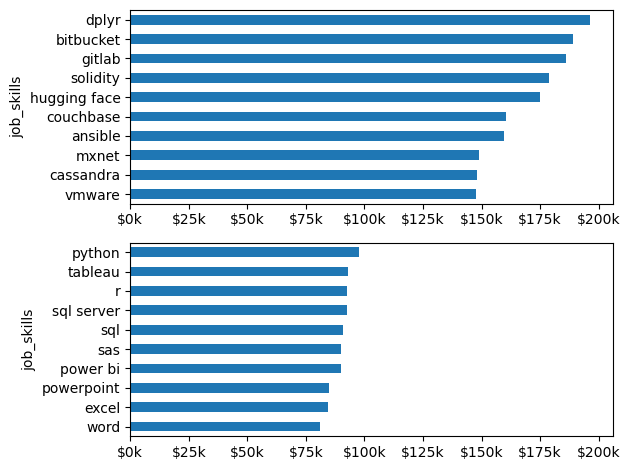

In [13]:
fig, ax = plt.subplots(2,1)

df_da_top_pay.plot(kind= 'barh', y= 'median', ax=ax[0], legend= False)
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

df_da_top_skills.plot(kind= 'barh', y='median', ax=ax[1], legend= False)
ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()


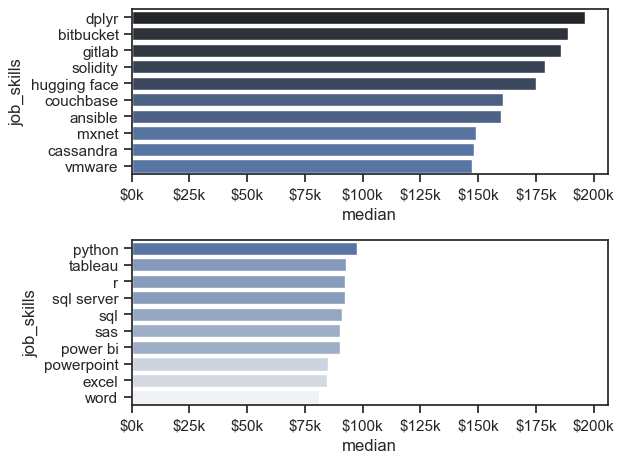

In [34]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
sns.barplot(data= df_da_top_pay, x= 'median', y= df_da_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

# df_da_top_skills.plot(kind= 'barh', y='median', ax=ax[1], legend= False)
sns.barplot(data= df_da_top_skills, x= 'median', y= df_da_top_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()


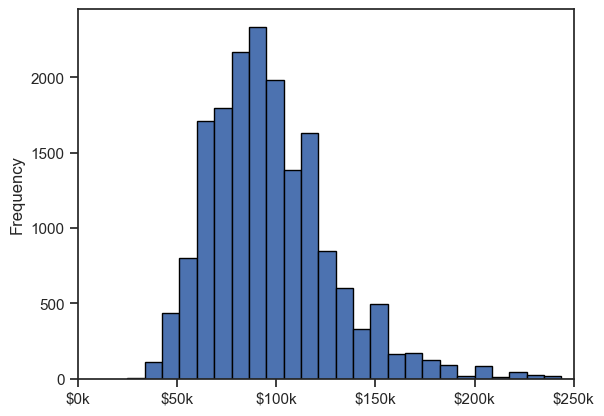

In [20]:
df_da_usa['salary_year_avg'].plot(kind= 'hist', bins=40, edgecolor= 'black' )

plt.xlim(0,250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}k'))

kde - kernal density estimation.

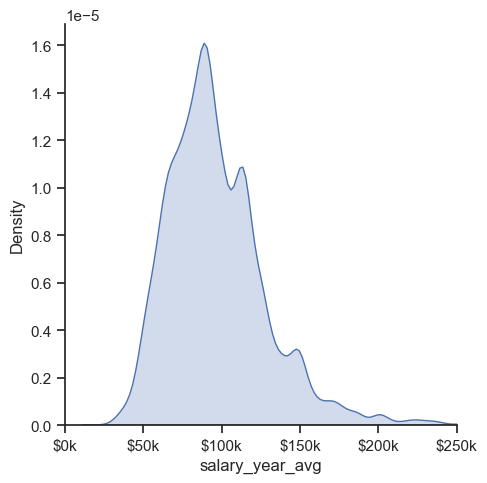

In [22]:
sns.displot(df_da_usa['salary_year_avg'], kind= 'kde', fill= True)

plt.xlim(0,250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}k'))

/var/folders/l7/yvmyd9912w18frsx1f4d8rmw0000gn/T/ipykernel_98876/336715536.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


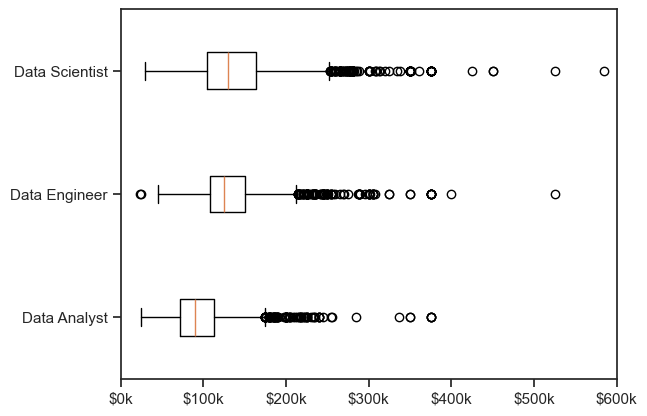

In [30]:
job_titles= ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_usa = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_usa = df_usa.dropna(subset=['salary_year_avg'])

job_list = [df_usa[df_usa['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)

plt.show()

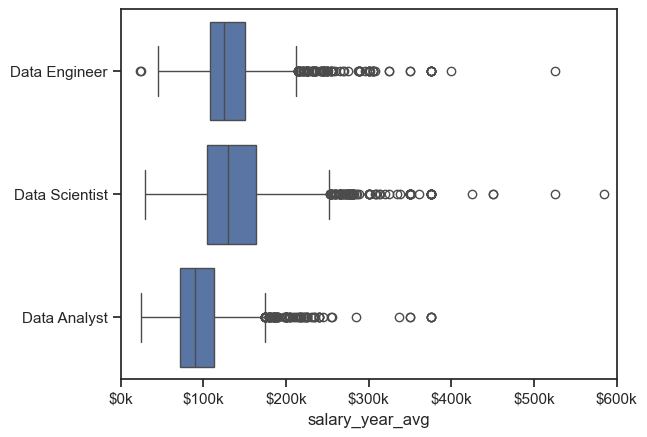

In [32]:
sns.boxplot(data= df_usa, x= 'salary_year_avg', y='job_title_short')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.ylabel('')

plt.show()